In [23]:
import numpy as np
import math
from scipy.linalg import hilbert
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('default')

# Функции подсчета чисел обусловленности

In [24]:
def cond_s(A):
    return np.linalg.norm(A) * np.linalg.norm(np.linalg.inv(A))

def cond_v(A):
    N = A.shape[0]
    det = abs(np.linalg.det(A))
    return np.prod([math.sqrt(sum([A[n, m] ** 2 for m in range(N)])) for n in range(N)]) / det

def cond_a(A):
    N = A.shape[0]
    C = np.linalg.inv(A)
    return max([np.linalg.norm(A[n,:]) * np.linalg.norm(C[:,n]) for n in range(N)])

def solve(A, b):
    return np.linalg.solve(A, b)

def error(x1, x2):
    return np.linalg.norm(x1 - x2)

def calc_conds(A):
    a = cond_a(A)
    v = cond_v(A)
    s = cond_s(A)
    return a, v, s

# Простой тест

In [25]:
def test_impl(A, x):
    N = A.shape[0]
    b = A @ x
    E = np.eye(N)

    for power in range(-2, -11, -1):
        alpha = 10 ** power
        A_r = A - alpha * E
        b_r = b - alpha
        a, v, s = calc_conds(A_r)
        x0 = solve(A_r, b_r)
        print('Угловой критерий:', a)
        print('Объемный критерий:', v)
        print('Спектральный критерий:', s)
        print('Alpha:', alpha, 'Error:', error(x, x0))

In [33]:
def test1():
    A = np.array([[1, 0.99], [0.99, 0.98]])
    x = np.ones((2, 1))
    test_impl(A, x)

test1()

Угловой критерий: 98.00510190801286
Объемный критерий: 98.00510190801285
Спектральный критерий: 196.02020202020188
Alpha: 0.01 Error: 0.0
Угловой критерий: 941.9052927437983
Объемный критерий: 941.9052927437989
Спектральный критерий: 1883.9066859065947
Alpha: 0.001 Error: 2.220446049250313e-16
Угловой критерий: 6577.408713894223
Объемный критерий: 6577.4087138942305
Спектральный критерий: 13155.488506331096
Alpha: 0.0001 Error: 5.241817692345521e-13
Угловой критерий: 16362.11886372257
Объемный критерий: 16362.118863722564
Спектральный критерий: 32725.907118473147
Alpha: 1e-05 Error: 1.3040565703802234e-12
Угловой критерий: 19221.396762845394
Объемный критерий: 19221.396762845383
Спектральный критерий: 38444.75464256091
Alpha: 1e-06 Error: 2.220446049250313e-16
Угловой критерий: 19563.262787242176
Объемный критерий: 19563.26278724217
Спектральный критерий: 39128.52157119384
Alpha: 1e-07 Error: 1.5591996861938542e-12
Угловой критерий: 19598.119399883617
Объемный критерий: 19598.119399883

# Тесты на матрицах Гильберта

## График зависимости погрешности от количества знаков после запятой

In [27]:
def test_hilbert():
    errors = {}
    for N in range(3, 11):
        A = hilbert(N)
        x = np.ones((N, 1))
        b = A @ x
        print('Hilbert matrix', str(N) + 'x' + str(N))
        errors[N] = []
        for decimals in range(3, 11):
            A_r = A.round(decimals)
            b_r = b.round(decimals)
            x0 = solve(A_r, b_r)
            e = error(x, x0)
            #print('Decimals:', decimals, 'Error:', e)
            errors[N].append(e)
    return errors

def plot_hilbert():
    errors = test_hilbert()
    #print(errors)
    df = pd.DataFrame(errors, index=range(3, 11))

    plt.figure(figsize=(15, 10), dpi=80)
    for key in df.keys():
        sns.lineplot(data=df[key], label=key, marker='o')

    plt.legend(title='Порядок матрицы Гильберта')
    plt.xlim(2, 11)
    plt.xlabel('Количество знаков после запятой', fontsize=20)
    plt.ylabel('Погрешность', fontsize=20)
    plt.legend(prop={'size': 20})
    plt.show()

Hilbert matrix 3x3
Hilbert matrix 4x4
Hilbert matrix 5x5
Hilbert matrix 6x6
Hilbert matrix 7x7
Hilbert matrix 8x8
Hilbert matrix 9x9
Hilbert matrix 10x10


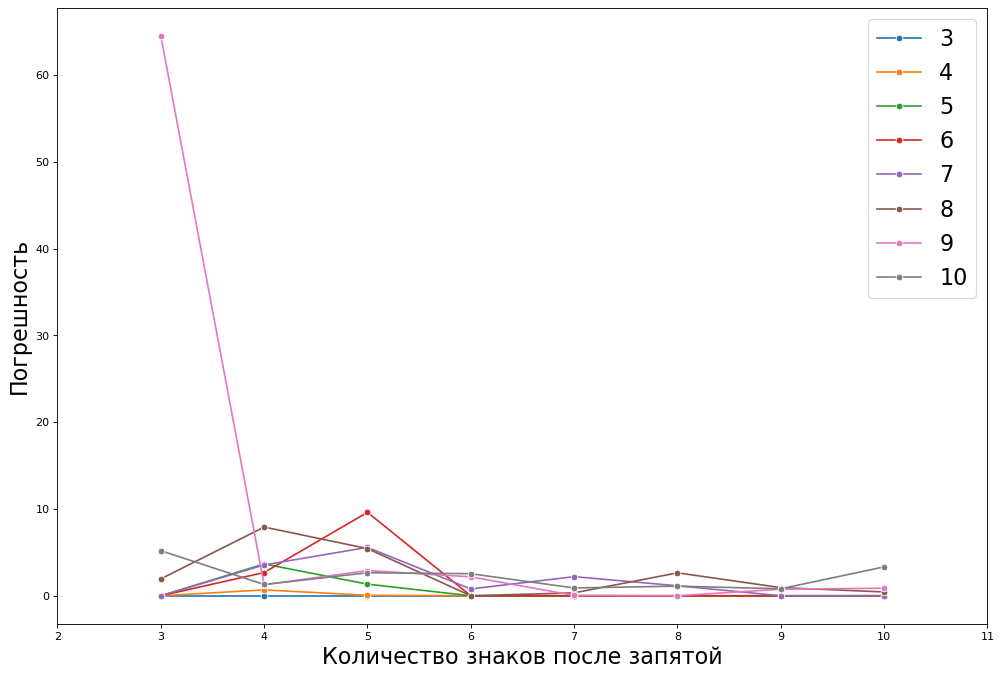

In [28]:
plot_hilbert()

## Графики корреляции чисел обусловленности и погрешности

In [29]:
def test_hilbert_cond(N):
    errors = {}
    A = hilbert(N)
    x = np.ones((N, 1))
    b = A @ x
    a_key = 'Угловой критерий'
    v_key = 'Объемный критерий'
    s_key = 'Спектральный критерий'
    error_str = 'Погрешность'
    errors = {error_str: [], a_key: [], v_key: [], s_key: []}
    for decimals in range(1, 21):
        A_r = A.round(decimals)
        b_r = b.round(decimals)
        a, v, s = calc_conds(A_r)
        x0 = solve(A_r, b_r)
        e = error(x, x0)
        errors[error_str].append(e)
        errors[a_key].append(a)
        errors[v_key].append(v)
        errors[s_key].append(s)
    return errors

def plot_hilbert_cond(N):
    errors = test_hilbert_cond(N)
    #print(errors)
    df = pd.DataFrame(errors, index=range(1, 21))

    plt.figure(figsize=(15, 10), dpi=80)
    for key in df.keys():
        sns.lineplot(data=df[key], label=key, marker='o')

    #x = np.array(range(0, 22))
    #y = np.array([1e-14, 1e-11, 1e-2, 1e1, 1e4, 1e7])
    plt.xlim(0, 22)
    plt.yscale('log')
    plt.xlabel('Количество знаков после запятой', fontsize=20)
    plt.ylabel('Порядок величины', fontsize=20)
    plt.legend(prop={'size': 20})
    plt.show()

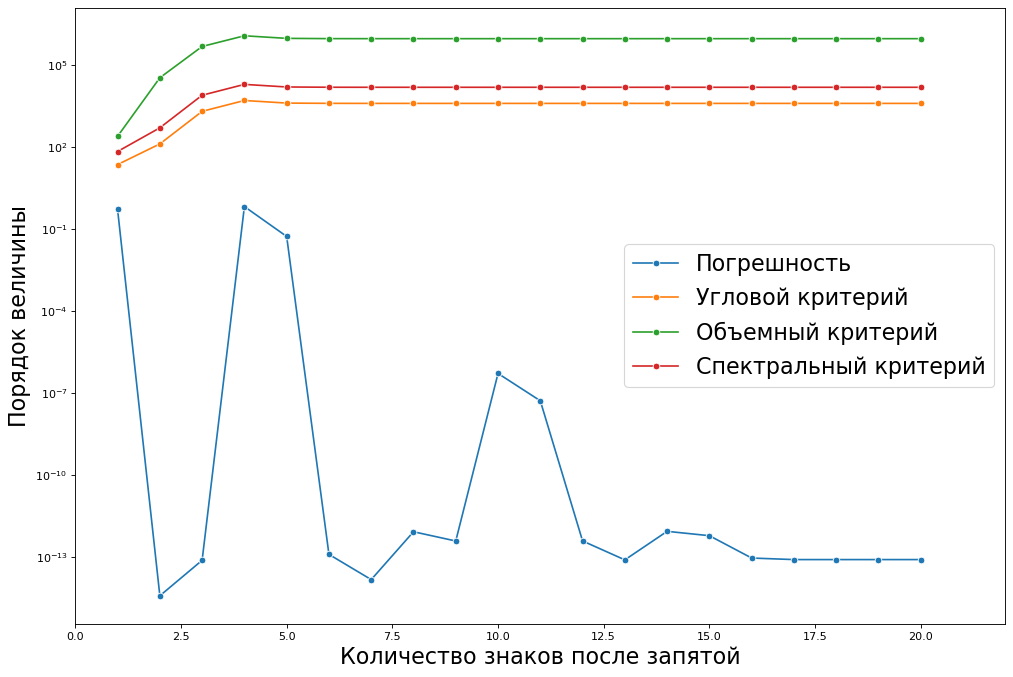

In [30]:
plot_hilbert_cond(4)

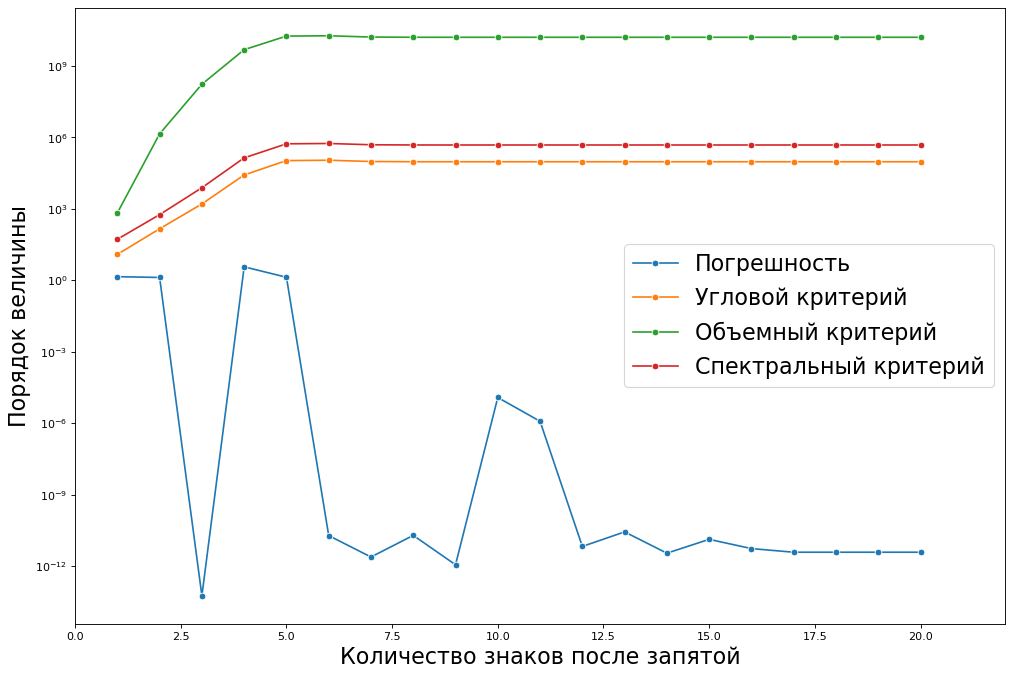

In [31]:
plot_hilbert_cond(5)

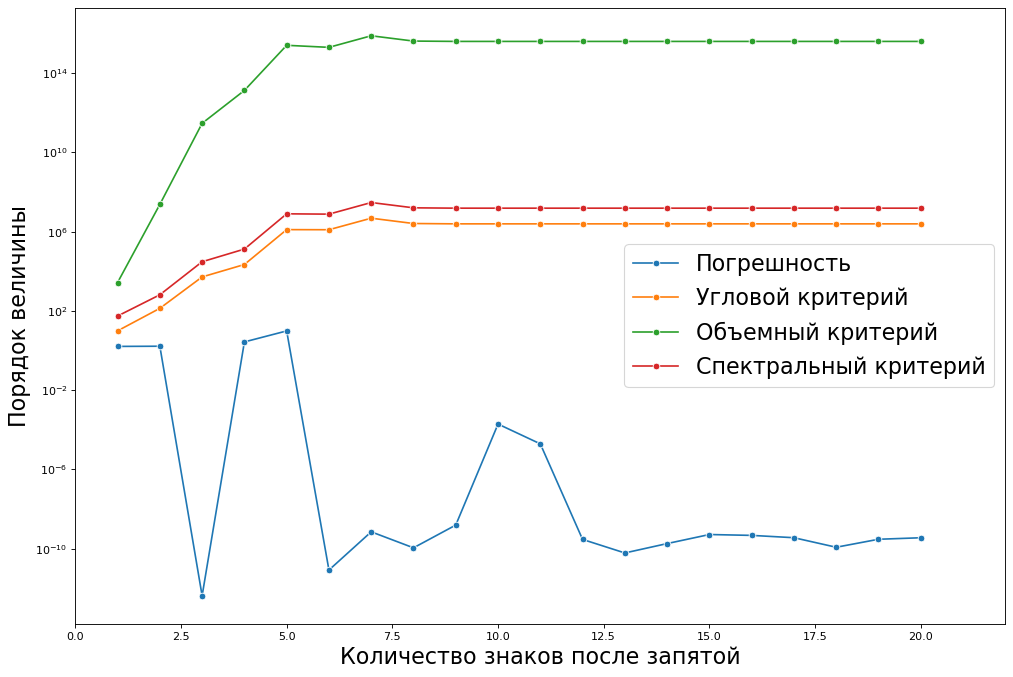

In [32]:
plot_hilbert_cond(6)